# World Airports-Analysis

Airports of the world with informations about codenames, elevation, frequency, runways and wikipedia links.

All the data are crowdsourced by the community of OurAirports.com

## Exploratory Data Analysis

In [2]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## read CSV file
Airports = pd.read_csv('World_Airports.csv')
Airports

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75047,-1.543935e+07,8.578445e+06,75048,342103,ZYXW,closed,Mt Logan Airstrip,60.792990,-138.694027,1997.0,...,NaN,NaN,"ZYXW, ZYXW, ZYA, YK90",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75048,1.374751e+07,5.128738e+06,75049,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75049,1.650311e+05,6.781062e+06,75050,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,...,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75050,5.265010e+06,-1.298433e+06,75051,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### understanding the data

In [4]:
## see information about of the data
Airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75052 entries, 0 to 75051
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  75051 non-null  float64
 1   Y                  75051 non-null  float64
 2   OBJECTID           75052 non-null  int64  
 3   id                 75052 non-null  int64  
 4   airport_ident      75052 non-null  object 
 5   type               75052 non-null  object 
 6   name               75052 non-null  object 
 7   latitude_deg       75052 non-null  float64
 8   longitude_deg      75052 non-null  float64
 9   elevation_ft       60789 non-null  float64
 10  continent          38826 non-null  object 
 11  iso_country        74793 non-null  object 
 12  iso_region         75052 non-null  object 
 13  municipality       70060 non-null  object 
 14  scheduled_service  75052 non-null  object 
 15  gps_code           41172 non-null  object 
 16  iata_code          886

In [5]:
## see head of the data
Airports.head()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0


In [6]:
## see tail of the data
Airports.tail()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
75047,-1.543935e+07,8.578445e+06,75048,342103,ZYXW,closed,Mt Logan Airstrip,60.792990,-138.694027,1997.0,...,NaN,NaN,"ZYXW, ZYXW, ZYA, YK90",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75048,1.374751e+07,5.128738e+06,75049,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75049,1.650311e+05,6.781062e+06,75050,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,...,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75050,5.265010e+06,-1.298433e+06,75051,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75051,-1.546665e+07,1.086205e+07,75052,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,...,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## see Statistics about Airports
Airports.describe()

,X,Y,OBJECTID,id,latitude_deg,longitude_deg,elevation_ft,frequency_mhz,runway_length_ft,runway_width_ft,runway_lighted,runway_closed
count,7.505100e+04,7.505100e+04,75052.000000,75052.000000,75052.000000,75052.000000,60789.000000,10673.000000,37819.000000,35575.000000,37999.000000,37999.000000
mean,-3.188512e+06,3.214841e+06,37526.500000,156746.571204,25.614653,-28.642508,1301.113359,131.459692,3050.838282,103.857006,0.232796,0.009395
std,9.599855e+06,3.325248e+06,21665.790539,160534.385051,26.295437,86.236455,1672.571965,70.497489,2589.459464,222.126728,0.422619,0.096473
min,-2.002382e+07,-1.574333e+07,1.000000,2.000000,-90.000000,-179.876999,-1266.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.047368e+07,1.269899e+06,18763.750000,18909.750000,11.325231,-94.086565,205.000000,120.075000,1500.000000,59.000000,0.000000,0.000000
50%,-7.723717e+06,4.180065e+06,37526.500000,40239.500000,35.118995,-69.383331,730.000000,122.900000,2623.000000,75.000000,0.000000,0.000000
75%,2.715492e+06,5.260454e+06,56289.250000,334350.250000,42.660451,24.393038,1613.000000,126.700000,3999.000000,100.000000,0.000000,0.000000
max,2.003480e+07,1.759752e+07,75052.000000,508396.000000,82.750000,179.975700,17372.000000,1340.000000,30000.000000,9000.000000,1.000000,1.000000


In [8]:
## see number of rows and columns
Airports.shape

(75052, 28)

In [9]:
## see type of colunms in Airports
Airports.dtypes

X                    float64
Y                    float64
OBJECTID               int64
id                     int64
airport_ident         object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
iso_country           object
iso_region            object
municipality          object
scheduled_service     object
gps_code              object
iata_code             object
local_code            object
home_link             object
wikipedia_link        object
keywords              object
description           object
frequency_mhz        float64
runway_length_ft     float64
runway_width_ft      float64
runway_surface        object
runway_lighted       float64
runway_closed        float64
dtype: object

In [10]:
## see each colunm in file
Airports.columns

Index(['X', 'Y', 'OBJECTID', 'id', 'airport_ident', 'type', 'name',
       'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent',
       'iso_country', 'iso_region', 'municipality', 'scheduled_service',
       'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link',
       'keywords', 'description', 'frequency_mhz', 'runway_length_ft',
       'runway_width_ft', 'runway_surface', 'runway_lighted', 'runway_closed'],
      dtype='object')

In [11]:
# see colunms nuniques values
for i in Airports.columns:
    if(i=='type' or i=='continent' or i=='iso_country' or i=='scheduled_service' or i=='runway_lighted' or i== 'runway_closed'):
        print(i," --> ", dict(Airports[i].value_counts()))

type  -->  {'small_airport': 39419, 'heliport': 19080, 'closed': 10164, 'medium_airport': 4747, 'seaplane_base': 1133, 'large_airport': 464, 'balloonport': 45}
continent  -->  {'AS': 10882, 'SA': 10271, 'EU': 9775, 'AF': 3968, 'OC': 3887, 'AN': 43}
iso_country  -->  {'US': 30003, 'BR': 6669, 'JP': 3312, 'CA': 2959, 'AU': 2553, 'MX': 2199, 'RU': 1541, 'KR': 1400, 'GB': 1371, 'DE': 1033, 'FR': 993, 'AR': 941, 'IT': 850, 'CO': 728, 'PH': 688, 'CN': 682, 'ZA': 645, 'PG': 612, 'IN': 607, 'VE': 601, 'ID': 578, 'ES': 506, 'CL': 505, 'KE': 375, 'PL': 336, 'TR': 310, 'CD': 301, 'CZ': 298, 'NZ': 281, 'IR': 276, 'NO': 252, 'SE': 251, 'AE': 248, 'UA': 247, 'PT': 223, 'TZ': 210, 'BO': 202, 'PE': 197, 'PK': 183, 'UZ': 180, 'KZ': 175, 'BE': 174, 'SA': 160, 'HN': 159, 'ZW': 155, 'BG': 154, 'AT': 150, 'CU': 149, 'EC': 144, 'DK': 135, 'CR': 134, 'BW': 134, 'MY': 134, 'GR': 132, 'HU': 131, 'NL': 125, 'ZM': 123, 'EG': 122, 'FI': 120, 'AO': 118, 'SK': 116, 'IE': 114, 'TH': 111, 'HK': 103, 'PY': 102, 'RO': 

### clean and filter the data

In [12]:
# find missing values 
Airports.isna()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75047,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,True,True,True,True
75048,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
75049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
75050,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [13]:
# find missing values 
Airports.isnull()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75047,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,True,True,True,True
75048,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
75049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
75050,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [14]:
## see missing values in data
Airports.isnull().sum()

X                        1
Y                        1
OBJECTID                 0
id                       0
airport_ident            0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14263
continent            36226
iso_country            259
iso_region               0
municipality          4992
scheduled_service        0
gps_code             33880
iata_code            66184
local_code           42500
home_link            71451
wikipedia_link       64178
keywords             58385
description          64992
frequency_mhz        64379
runway_length_ft     37233
runway_width_ft      39477
runway_surface       37488
runway_lighted       37053
runway_closed        37053
dtype: int64

In [15]:
## copy the data 
train = Airports.copy()
train

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75047,-1.543935e+07,8.578445e+06,75048,342103,ZYXW,closed,Mt Logan Airstrip,60.792990,-138.694027,1997.0,...,NaN,NaN,"ZYXW, ZYXW, ZYA, YK90",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75048,1.374751e+07,5.128738e+06,75049,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75049,1.650311e+05,6.781062e+06,75050,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,...,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75050,5.265010e+06,-1.298433e+06,75051,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
## drop useless columns
train = train.drop(columns=['X','Y','name','OBJECTID','home_link','keywords','wikipedia_link','description','iata_code'])
train.head()

,id,airport_ident,type,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,6528,00CA,small_airport,35.354740,-116.885329,3038.0,NaN,US,US-CA,Barstow,no,00CA,00CA,122.9,6000.0,80.0,ASPH,0.0,0.0
1,6589,01FL,small_airport,28.781900,-81.159203,19.0,NaN,US,US-FL,Geneva,no,01FL,01FL,122.9,3000.0,50.0,TURF,1.0,0.0
2,6756,04CA,small_airport,34.563900,-117.675003,3020.0,NaN,US,US-CA,Palmdale,no,KGXA,04CA,122.9,5000.0,150.0,ASPH,0.0,0.0
3,6779,04MS,small_airport,32.940537,-90.836683,100.0,NaN,US,US-MS,Rolling Fork,no,04MS,04MS,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,6784,04NV,small_airport,35.755501,-115.665001,2620.0,NaN,US,US-NV,Sandy Valley,no,04NV,04NV,123.0,3240.0,45.0,ASPH,1.0,0.0


we replace null values with continent,iso_country,municipality and runway_surface by unkown

In [17]:
## replace nan values in continent with unkown
train['continent'].replace(np.nan,'unkown', inplace=True)

In [18]:
## replace nan values in iso_country with unkown
train['iso_country'].replace(np.nan,'unkown', inplace=True)

In [19]:
## replace nan values in municipality with unkown
train['municipality'].replace(np.nan,'unkown', inplace=True)

we replace null values with gps_code and local_code by 0000

In [20]:
train['gps_code'].replace(np.nan,'0000', inplace=True) 

In [21]:
train['local_code'].replace(np.nan,'0000', inplace=True)

we replace null values with elevation_ft, frequency_mhz , runway_length_ft and runway_width_ft by 0

In [22]:
train['elevation_ft'].replace(np.nan,0, inplace=True)

In [23]:
train['frequency_mhz'].replace(np.nan,0, inplace=True)

In [24]:
train['runway_length_ft'].replace(np.nan,0, inplace=True)

In [25]:
train['runway_width_ft'].replace(np.nan,0, inplace=True)

In [26]:
## we see colunms after cleaning data
train.isnull().sum()

id                       0
airport_ident            0
type                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent                0
iso_country              0
iso_region               0
municipality             0
scheduled_service        0
gps_code                 0
local_code               0
frequency_mhz            0
runway_length_ft         0
runway_width_ft          0
runway_surface       37488
runway_lighted       37053
runway_closed        37053
dtype: int64

In [27]:
def degree(x):
    if x == 'small_airport':
        return 1
    elif x == 'heliport':
        return 2
    elif x == 'closed':
        return 3
    elif x == 'medium_airport':
        return 4
    elif x == 'seaplane_base':
        return 5
    elif x == 'large_airport':
        return 6
    else:
        return 7
train['type'] = train['type'].apply(degree)
train['type']

0        1
1        1
2        1
3        1
4        1
        ..
75047    3
75048    4
75049    2
75050    1
75051    3
Name: type, Length: 75052, dtype: int64

In [28]:
def num(x):
    if x == 'AS':
        return 1
    elif x == 'SA':
        return 2
    elif x == 'EU':
        return 3
    elif x == 'AF':
        return 4
    elif x == 'OC':
        return 5
    elif x == 'AN':
        return 6
    else:
        return 0
train['continent'] = train['continent'].apply(num)
train['continent']

0        0
1        0
2        0
3        0
4        0
        ..
75047    0
75048    1
75049    3
75050    4
75051    0
Name: continent, Length: 75052, dtype: int64

In [29]:
## handling scheduled_service
train['scheduled_service'] = [1 if i =='yes' else 0 for i in train.scheduled_service]

### Visualization of Data

Text(0.5, 1.0, 'the common type of Airports')

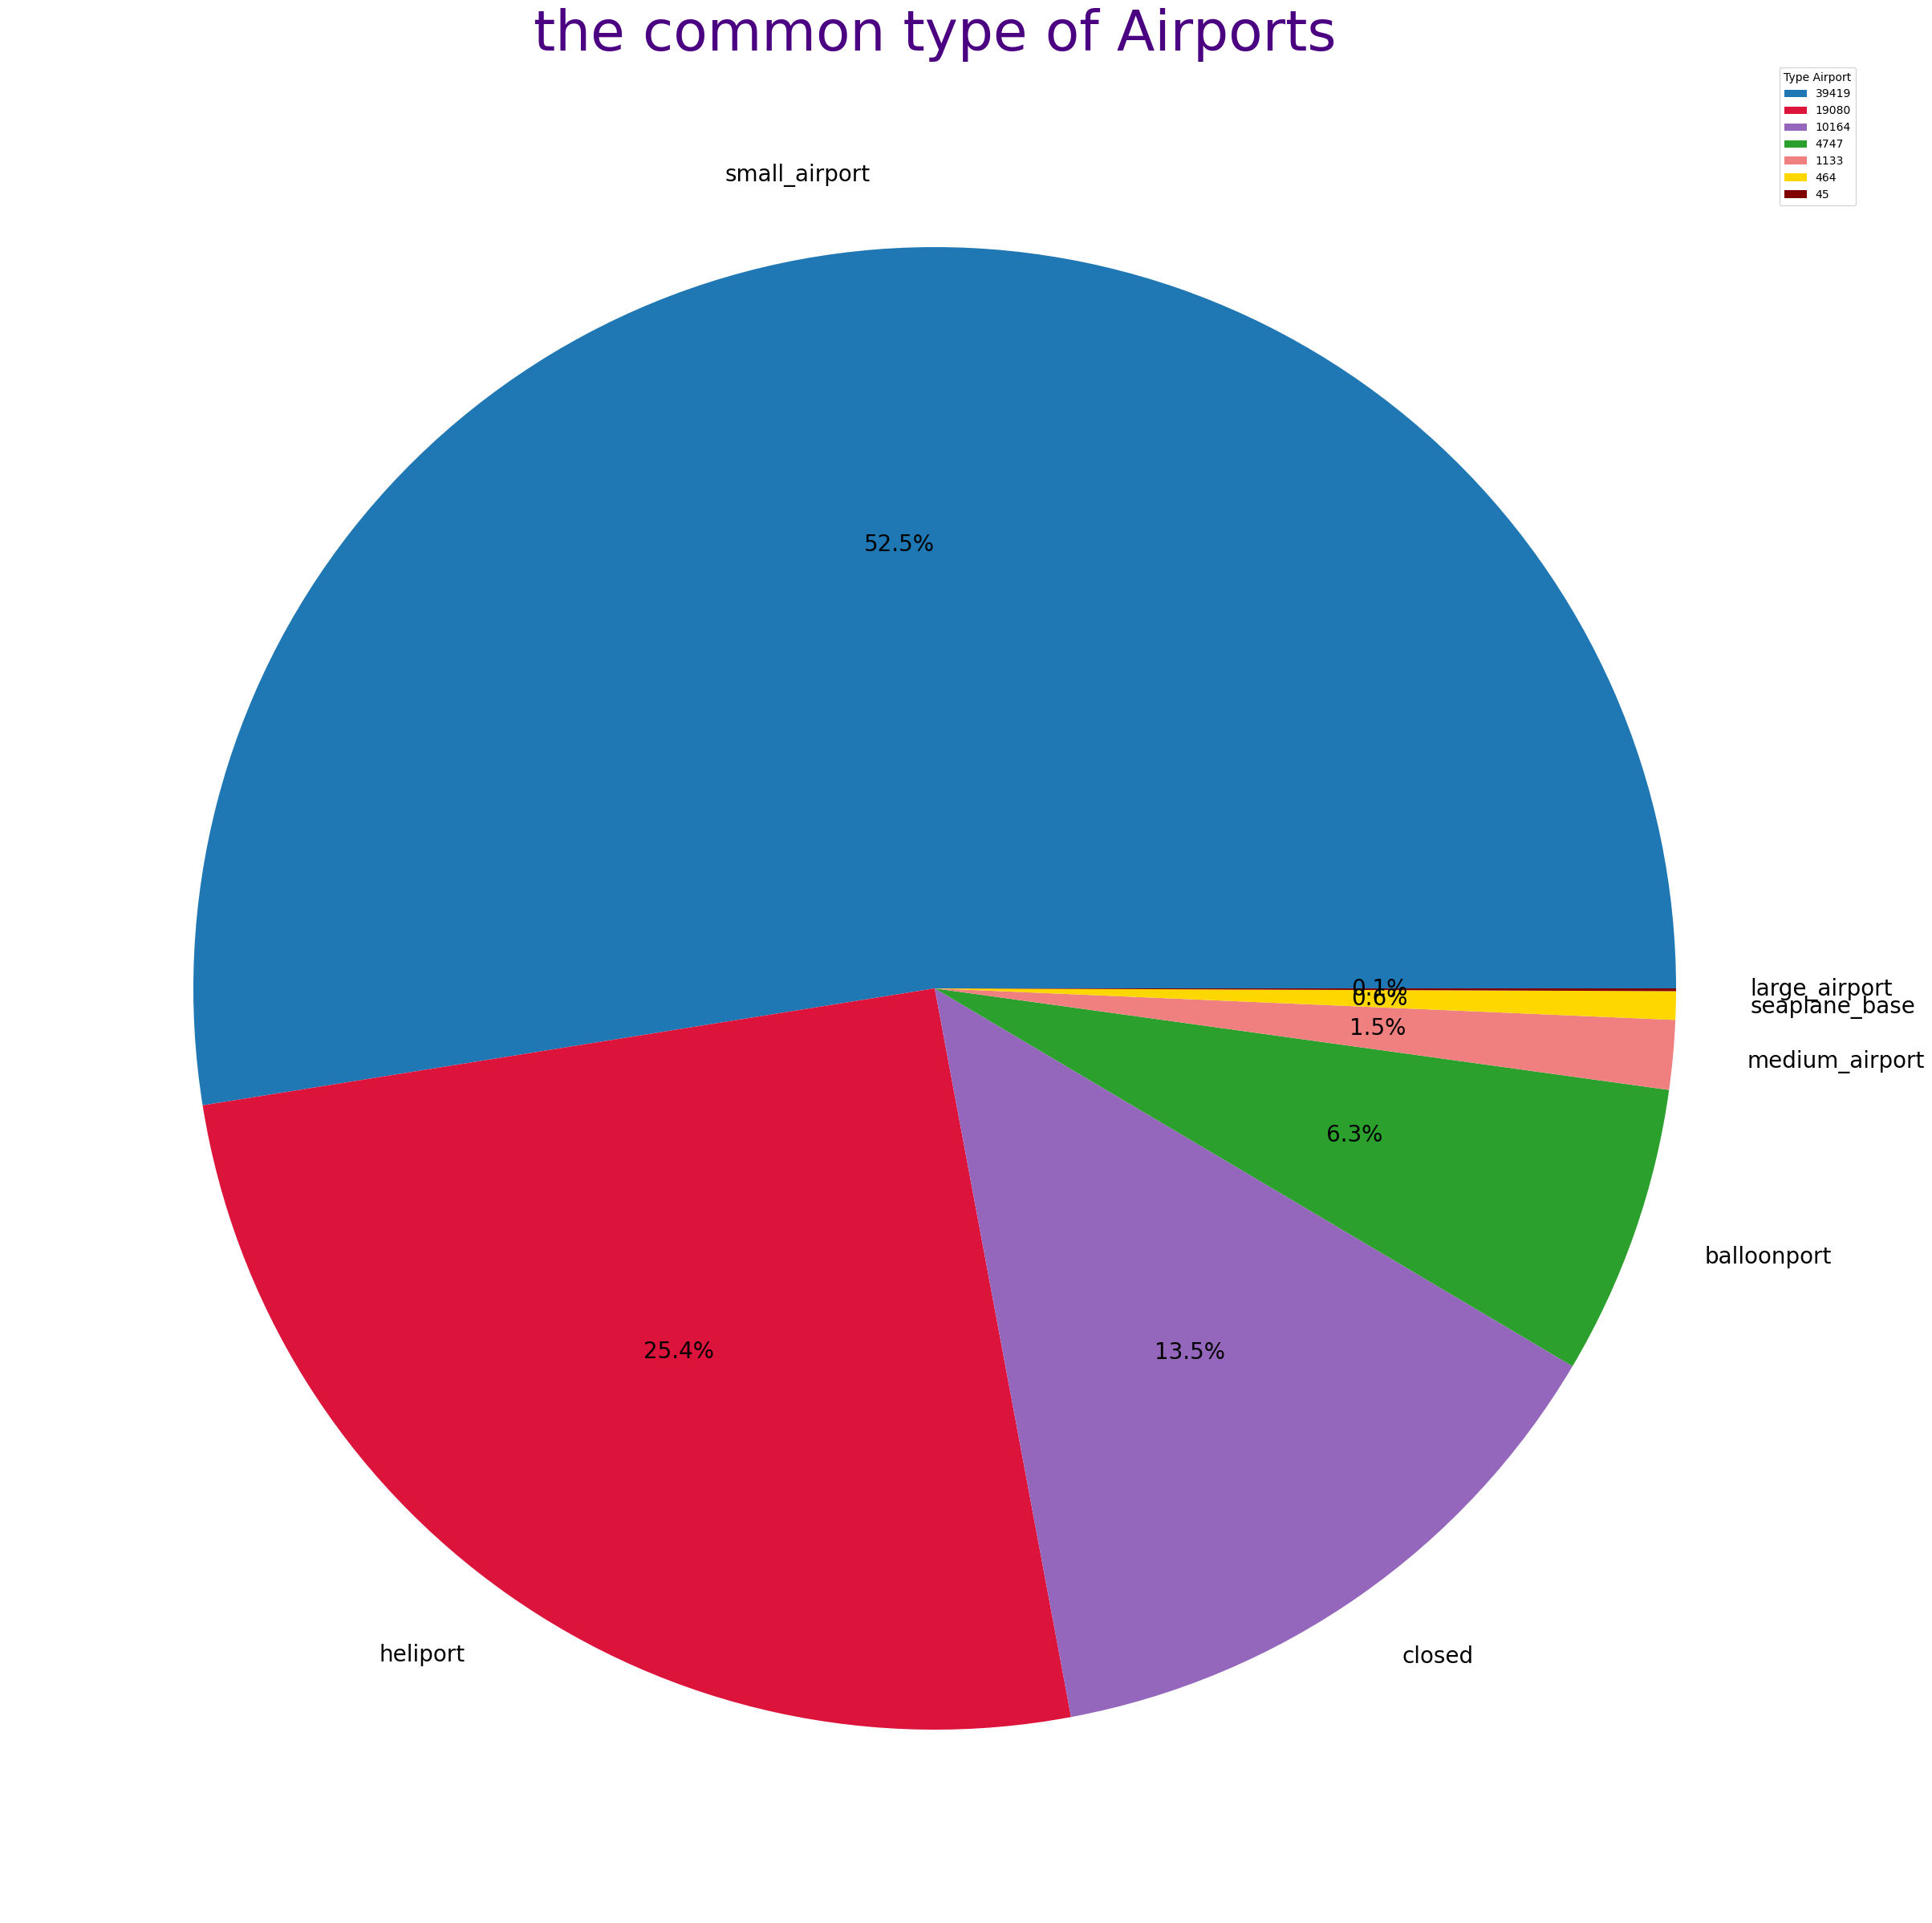

In [30]:
labels = ['small_airport','heliport','closed','balloonport','medium_airport','seaplane_base','large_airport']
size = train['type'].value_counts()
colors =['#1f77b4','#DC143C','#9467bd','#2ca02c','#F08080','#FFD700','#800000']
plt.figure(figsize = (30,30))
plt.pie(size, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20,'color':'black'}, colors = colors,startangle=0)
plt.legend(train['type'].value_counts(), loc = 'upper right', title = 'Type Airport')
plt.title('the common type of Airports', color = '#4B0082', fontsize = 50)

Text(0.5, 0, "{1: 'small_airport', 2: 'heliport', 3: 'closed', 4: 'balloonport', 5: 'medium_airport', 6: 'seaplane_base', 7: 'large_airport'}")

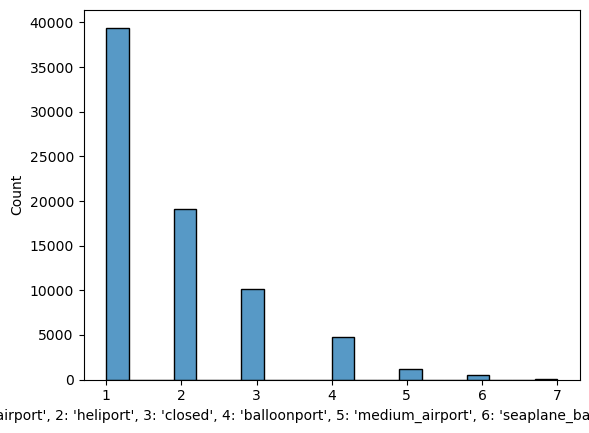

In [31]:
data ={1:'small_airport',2:'heliport',3:'closed',4:'balloonport',5:'medium_airport',6:'seaplane_base',7:'large_airport'}
sns.histplot(data=train,x='type',bins=20)
plt.xlabel(data)

Text(0.5, 1.0, 'the Percentage of Runway Lighted in Airports')

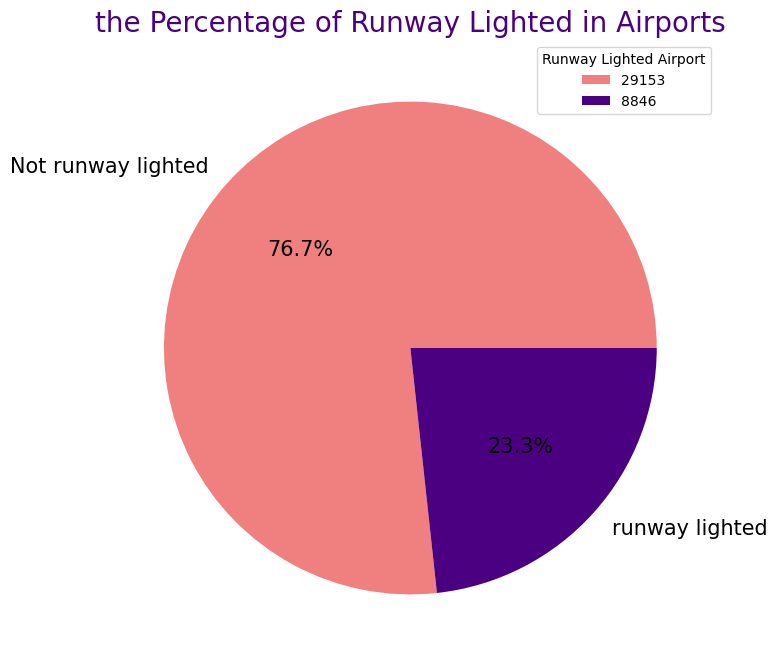

In [32]:
labels = ['Not runway lighted','runway lighted']
size = train['runway_lighted'].value_counts()
colors =['#F08080','#4B0082']
plt.figure(figsize = (8,8))
plt.pie(size, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15,'color':'black'}, colors = colors,startangle=0)
plt.legend(train['runway_lighted'].value_counts(), loc = 'upper right', title = 'Runway Lighted Airport')
plt.title('the Percentage of Runway Lighted in Airports', color = '#4B0082', fontsize = 20)

Text(0.5, 1.0, 'the Percentage of Runway Closed in Airports')

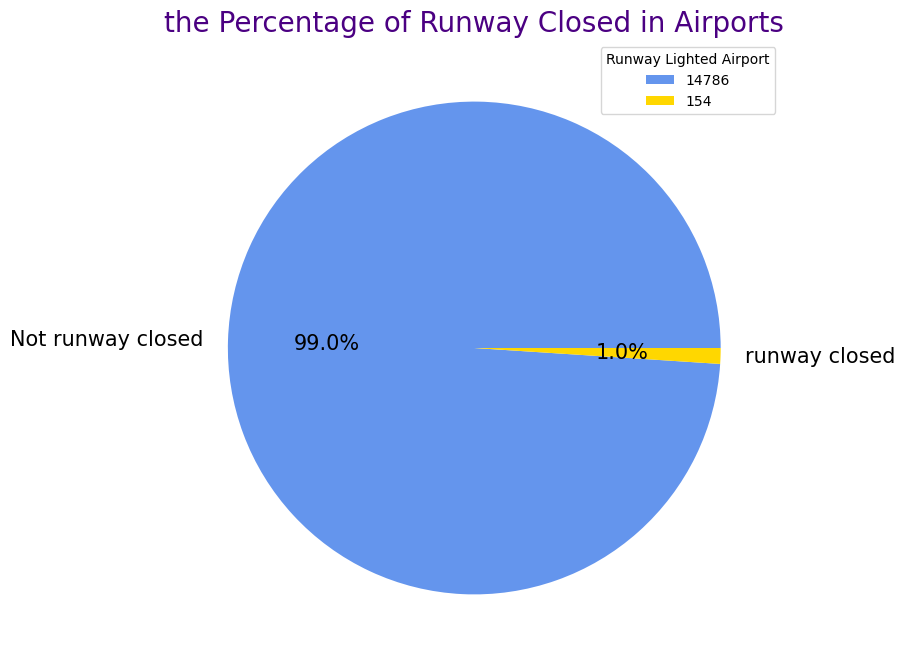

In [39]:
labels = ['Not runway closed','runway closed']
size = train['runway_closed'].value_counts()
colors =['#6495ED','#FFD700']
plt.figure(figsize = (8,8))
plt.pie(size, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15,'color':'black'}, colors = colors,startangle=0)
plt.legend(train['runway_closed'].value_counts(), loc = 'upper right', title = 'Runway Lighted Airport')
plt.title('the Percentage of Runway Closed in Airports', color = '#4B0082', fontsize = 20)

Text(0.5, 1.0, 'the Percentage of Scheduled Service in Airports')

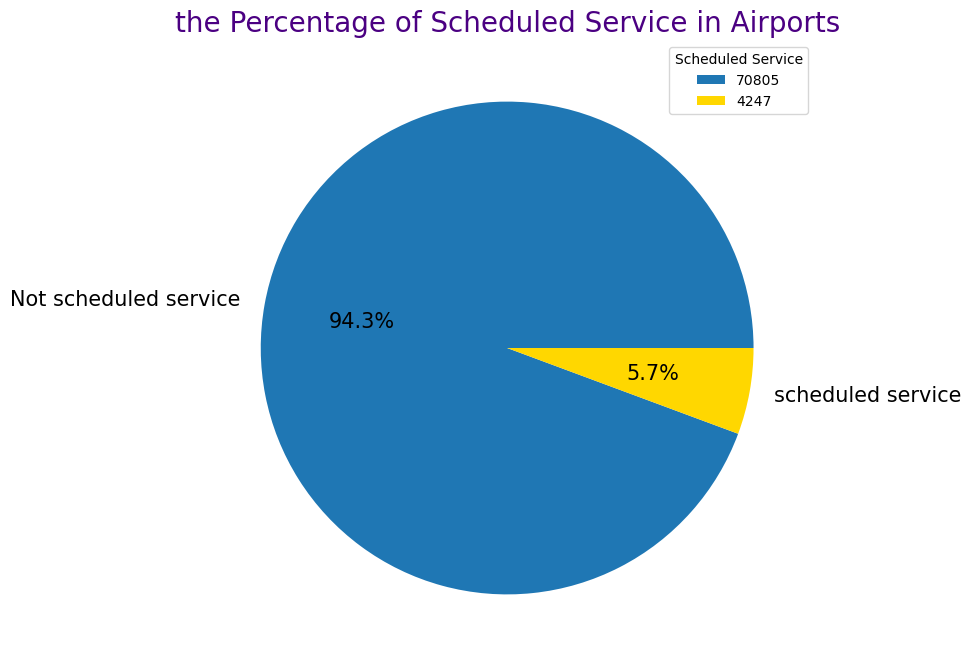

In [34]:

labels = ['Not scheduled service','scheduled service']
size = train['scheduled_service'].value_counts()
colors =['#1f77b4','#FFD700']
plt.figure(figsize = (8,8))
plt.pie(size, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15,'color':'black'}, colors = colors,startangle=0)
plt.legend(train['scheduled_service'].value_counts(), loc = 'upper right', title = 'Scheduled Service')
plt.title('the Percentage of Scheduled Service in Airports', color = '#4B0082', fontsize = 20)

Text(0.5, 1.0, 'the number of Airports in each Continent')

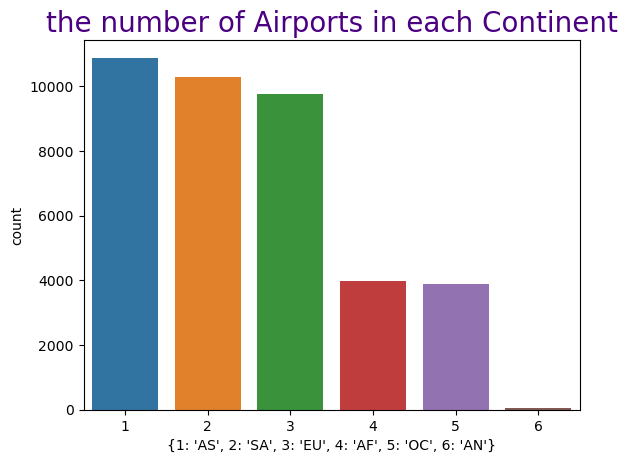

In [35]:
data1 ={1:'AS',2:'SA',3:'EU',4:'AF',5:'OC',6:'AN'}
train = train[train['continent'] != 0]
sns.countplot(data=train,x='continent')
plt.xlabel(data1)
plt.title('the number of Airports in each Continent',color='#4B0082',fontsize=20)

<Axes: xlabel='elevation_ft', ylabel='Count'>

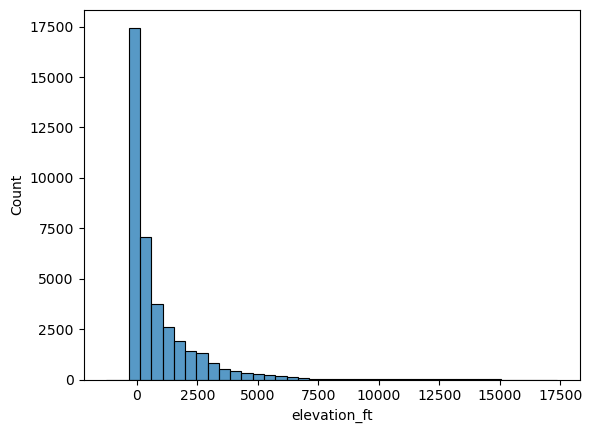

In [36]:
sns.histplot(data=train,x='elevation_ft',bins=40)

<Axes: xlabel='runway_length_ft', ylabel='Count'>

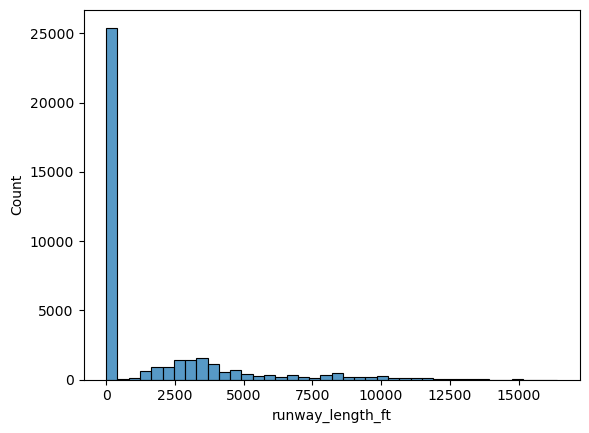

In [37]:
sns.histplot(data=train,x='runway_length_ft',bins=40)

<Axes: xlabel='runway_width_ft', ylabel='Count'>

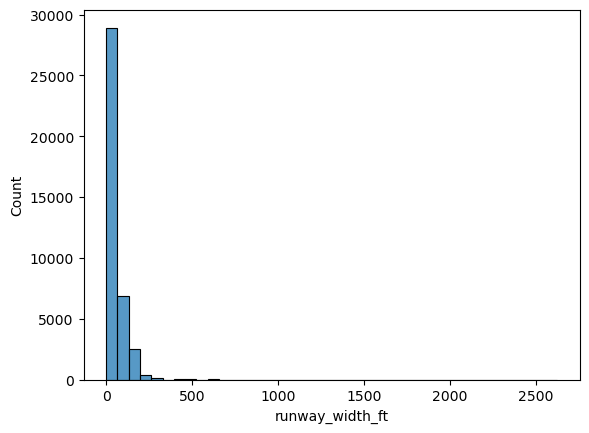

In [38]:
sns.histplot(data=train,x='runway_width_ft',bins=40)

<Axes: xlabel='frequency_mhz', ylabel='Count'>

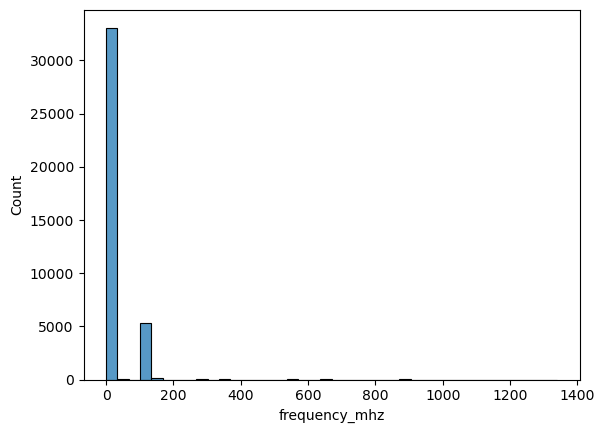

In [43]:
sns.histplot(data=train,x='frequency_mhz',bins=40)

<Axes: ylabel='latitude_deg'>

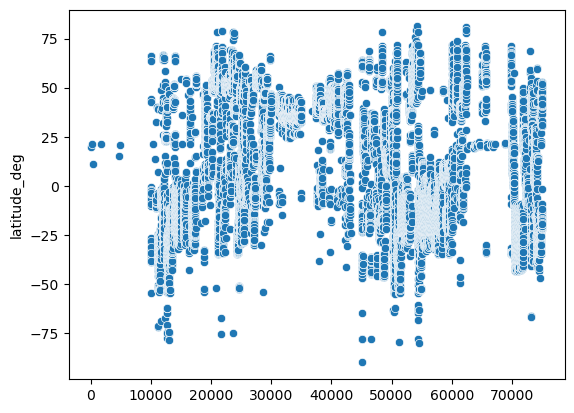

In [40]:
sns.scatterplot(data=train.latitude_deg)

<Axes: ylabel='longitude_deg'>

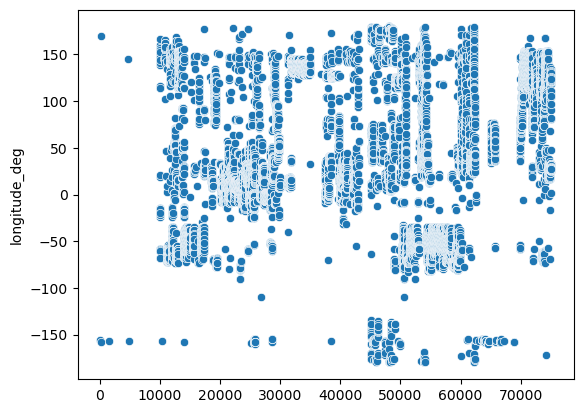

In [41]:
sns.scatterplot(data=train.longitude_deg)